***AVISO**: Esse Notebook foi feito com base na estrutura do Databricks Free Edition, que utiliza catálogos.*

# **ETAPA 5 - ANÁLISES AD-HOC**

---
---

<br>

Essa etapa será responsável por responder perguntas pré-selecionadas que são ad-hoc's, utilizando resultado gerado pela estrutura completa das etapas anteriores.

*`Complete as informações necessárias nos trechos que estão destacados em vermelho assim como esse, seguindo o padrão snake_case.`*

<br><br>

---
---

### Pergunta de Negócio 01 - **_Como evoluíram as vendas mensais por categoria entre 2022 e 2025?_**

A análise da evolução das vendas mensais por categoria, no período de 2022 a 2025, permite identificar de forma clara os padrões de sazonalidade do negócio, bem como comparar o comportamento e o crescimento relativo entre os diferentes segmentos do portfólio.

De maneira geral, observa-se que todas as categorias apresentam um comportamento estável ao longo do tempo, com oscilações mensais recorrentes, porém sem indícios de quedas abruptas ou tendências de retração prolongada. Esse padrão indica uma demanda consistente, sustentada ao longo dos anos analisados, reforçando a maturidade do portfólio de produtos.

As categorias de Móveis, Eletrônicos, Pet Shop e Vestuário concentram os maiores volumes absolutos de vendas mensais durante todo o período. Em especial, Móveis e Eletrônicos mantêm patamares elevados de faturamento, com picos recorrentes ao longo dos anos, o que evidencia sua alta relevância estratégica para o negócio. Além disso, essas categorias apresentam sinais de crescimento gradual, sobretudo a partir de 2024, sugerindo ganho progressivo de participação no faturamento total.

A categoria Pet Shop se destaca pelo comportamento extremamente estável, com valores elevados e baixa volatilidade relativa. Esse padrão sugere uma demanda contínua e recorrente, pouco sensível a oscilações sazonais mais intensas, caracterizando esse segmento como um importante amortecedor de receita ao longo do ano.

As categorias Alimentos, Bebidas e Cosméticos apresentam um comportamento intermediário, com volumes consistentes e oscilações mensais moderadas. Embora também sejam impactadas por sazonalidade, essas categorias mantêm uma base de consumo relativamente estável, com variações pontuais associadas a ciclos naturais de consumo e a períodos específicos do calendário.

Por sua vez, as categorias Brinquedos, Calçados e Papelaria demonstram maior sensibilidade à sazonalidade. Em especial, Brinquedos apresenta picos recorrentes nos meses finais do ano, indicando forte associação a datas comemorativas e ao aumento do consumo no período de fim de ano. Calçados e Papelaria também exibem oscilações mais perceptíveis em determinados meses, reforçando a influência do calendário comercial sobre essas categorias.

A categoria Esportes, apesar de apresentar os menores volumes relativos de faturamento quando comparada às demais, demonstra um comportamento bastante estável, com variações mensais suaves. Isso indica um segmento com demanda constante, porém com crescimento relativo mais limitado ao longo do período analisado.

Além da análise por categoria, a série temporal evidencia um padrão sazonal recorrente e consistente ao longo de todos os anos. Independentemente do segmento, observa-se a repetição de ciclos de queda e recuperação em meses específicos, com destaque para fevereiro e junho, que concentram as retrações mais evidentes no volume de vendas.

O mês de fevereiro apresenta, de forma generalizada, uma queda significativa nas vendas em praticamente todas as categorias. Esse comportamento pode ser explicado por fatores típicos do varejo brasileiro, como a redução do número de dias úteis, o impacto do período pós-festas e a concentração de despesas no início do ano. Categorias como Vestuário, Eletrônicos, Móveis e Brinquedos mostram retrações claras nesse período, reforçando o caráter estrutural dessa sazonalidade.

De forma semelhante, o mês de junho também se destaca como um ponto recorrente de desaceleração nas vendas. Essa queda é observada em diversas categorias, incluindo Alimentos, Bebidas, Cosméticos, Calçados e Esportes, sugerindo um período de transição no consumo. Esse comportamento pode estar associado ao intervalo entre campanhas promocionais mais fortes e à redistribuição do orçamento dos consumidores ao longo do primeiro semestre.

Após esses períodos de retração, observa-se um movimento consistente de recuperação nos meses subsequentes. Após fevereiro, as vendas tendem a se normalizar a partir de março e abril. Da mesma forma, a queda observada em junho é seguida por uma retomada a partir de julho e agosto, especialmente em categorias como Vestuário, Eletrônicos e Pet Shop, que demonstram maior resiliência.

O segundo semestre, de forma geral, apresenta volumes superiores ao primeiro, com picos recorrentes entre outubro, novembro e dezembro. Esse comportamento é particularmente evidente nas categorias de Brinquedos, Eletrônicos, Móveis e Vestuário, refletindo o impacto de campanhas promocionais, datas comemorativas e do aumento do consumo no final do ano. Esses meses representam períodos estratégicos para maximização do faturamento.

Em síntese, a análise evidencia um portfólio com demanda estável, categorias líderes em volume e crescimento relativo, e uma sazonalidade bem definida, marcada por quedas recorrentes em fevereiro e junho e forte recuperação no segundo semestre. Esses insights são fundamentais para apoiar decisões estratégicas de planejamento de estoque, definição de campanhas promocionais e priorização de categorias ao longo do ano.

A seguir, código que executa consulta com cenário da pergunta:

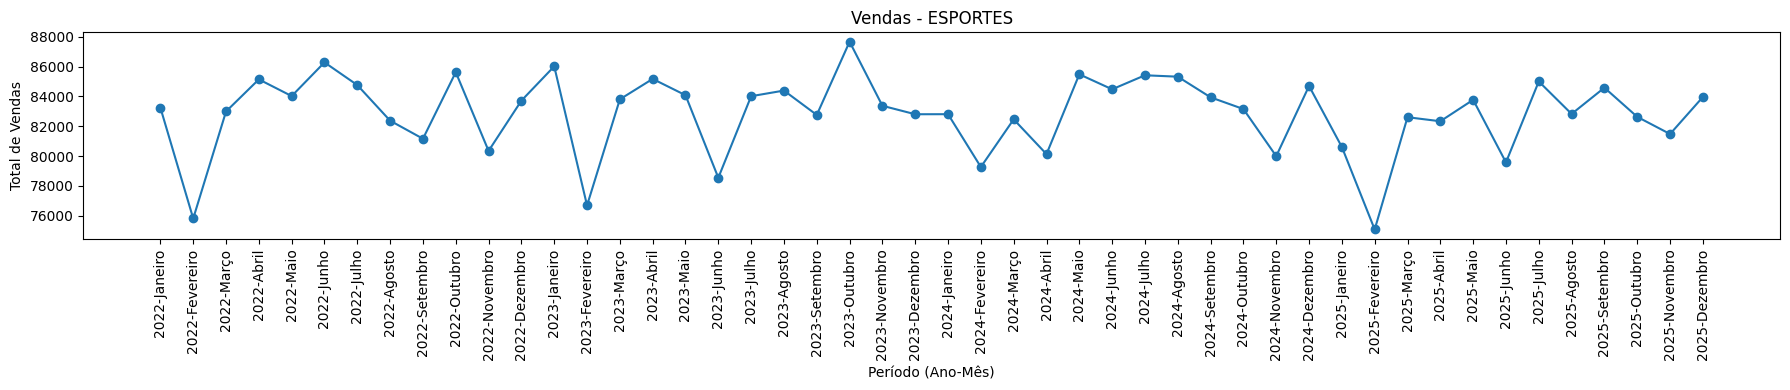

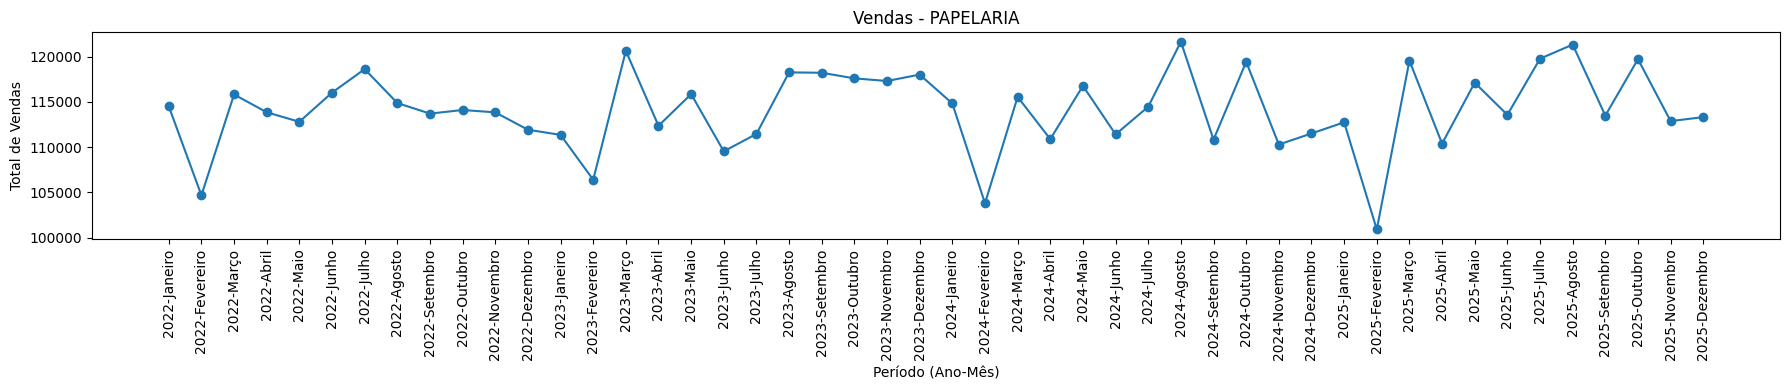

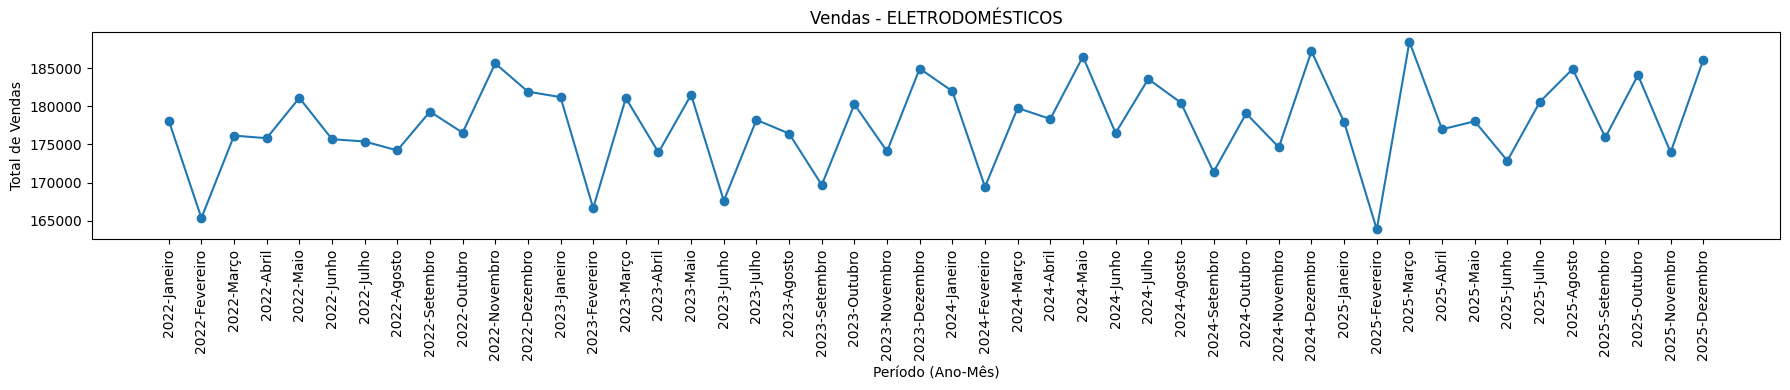

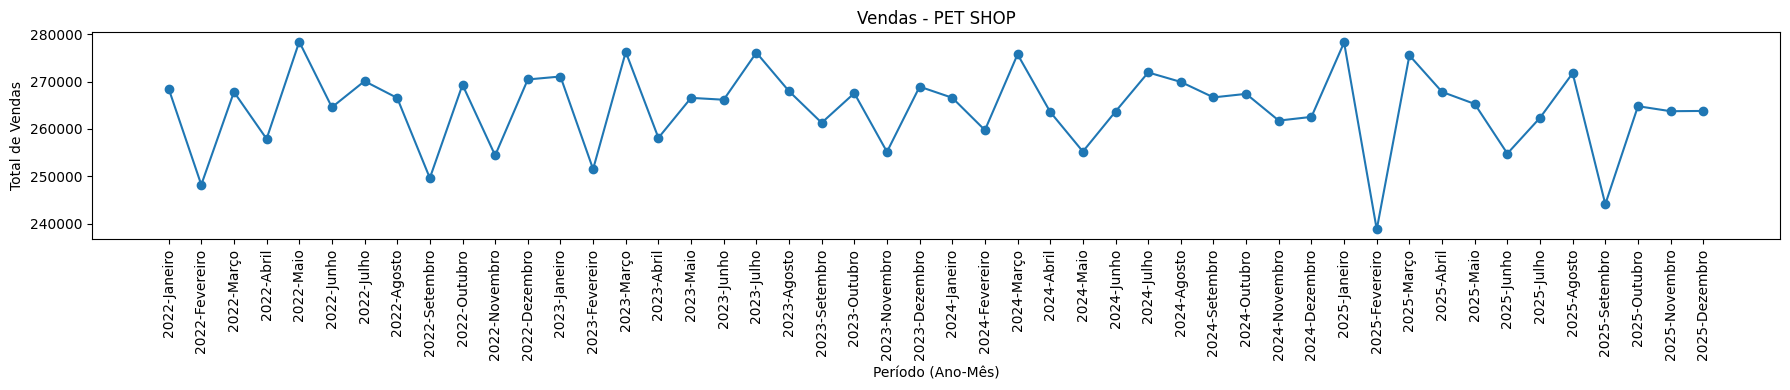

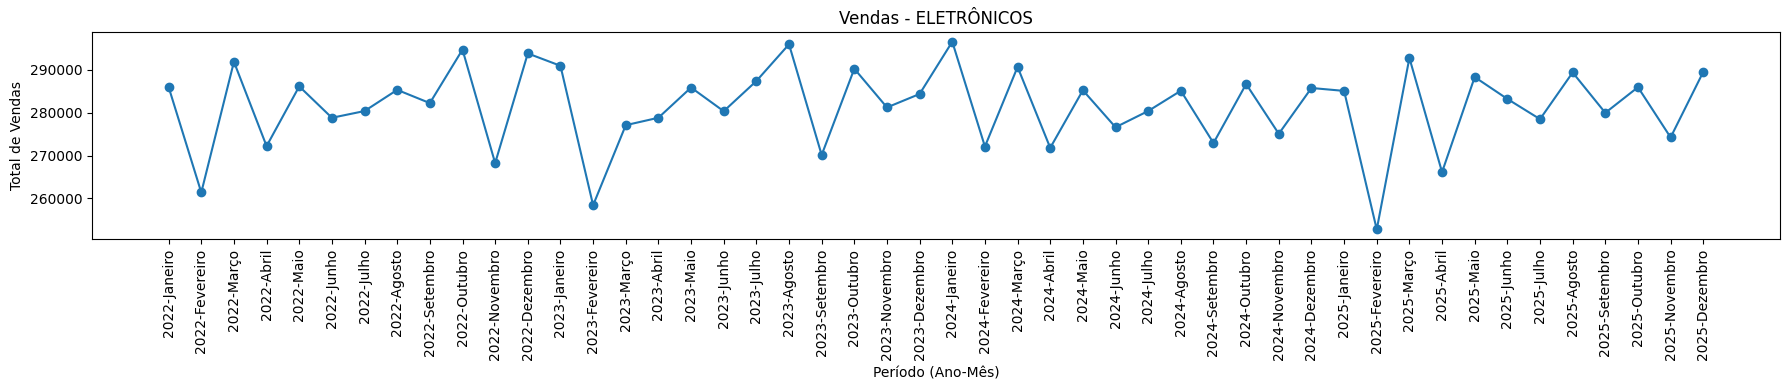

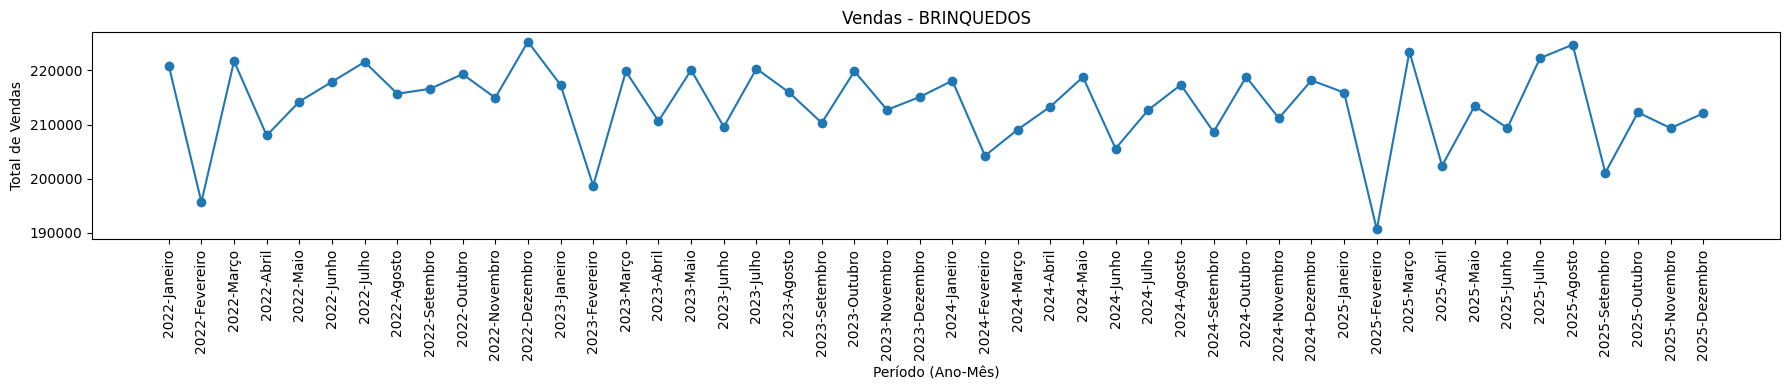

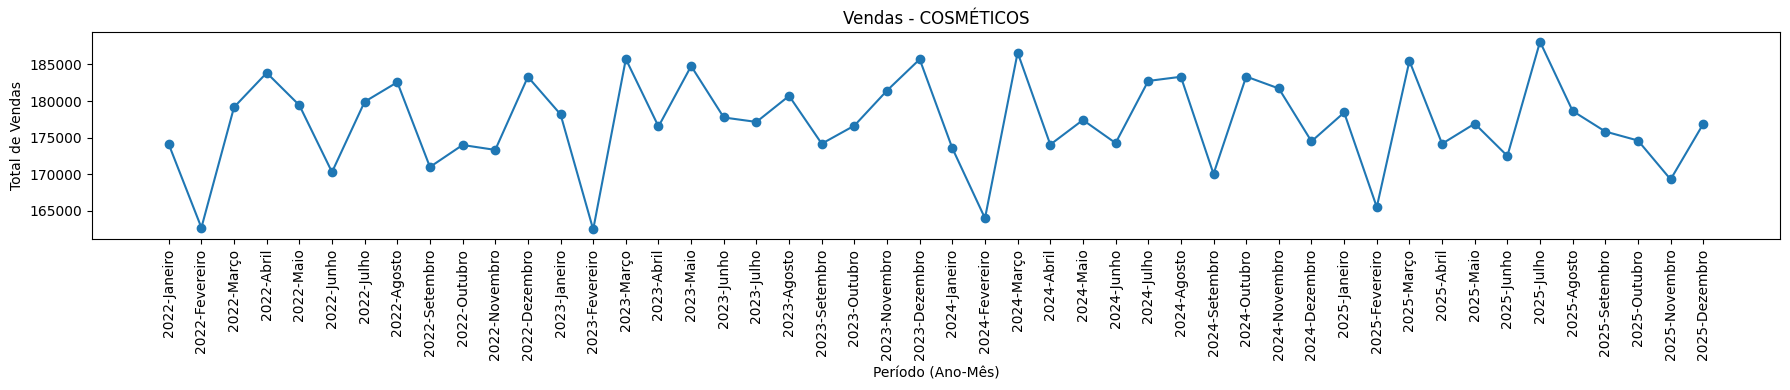

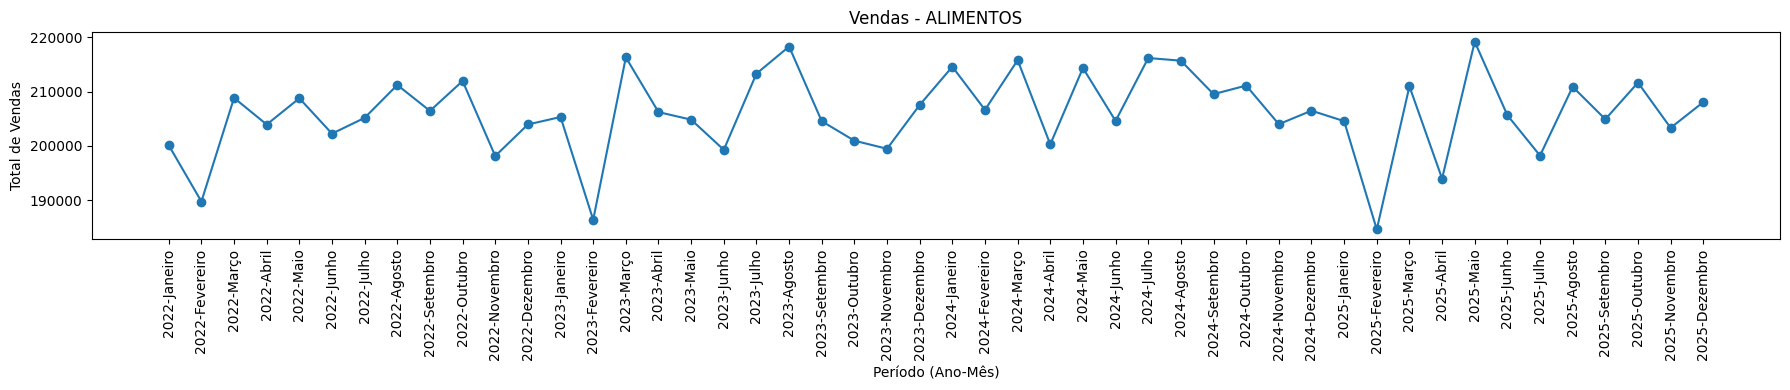

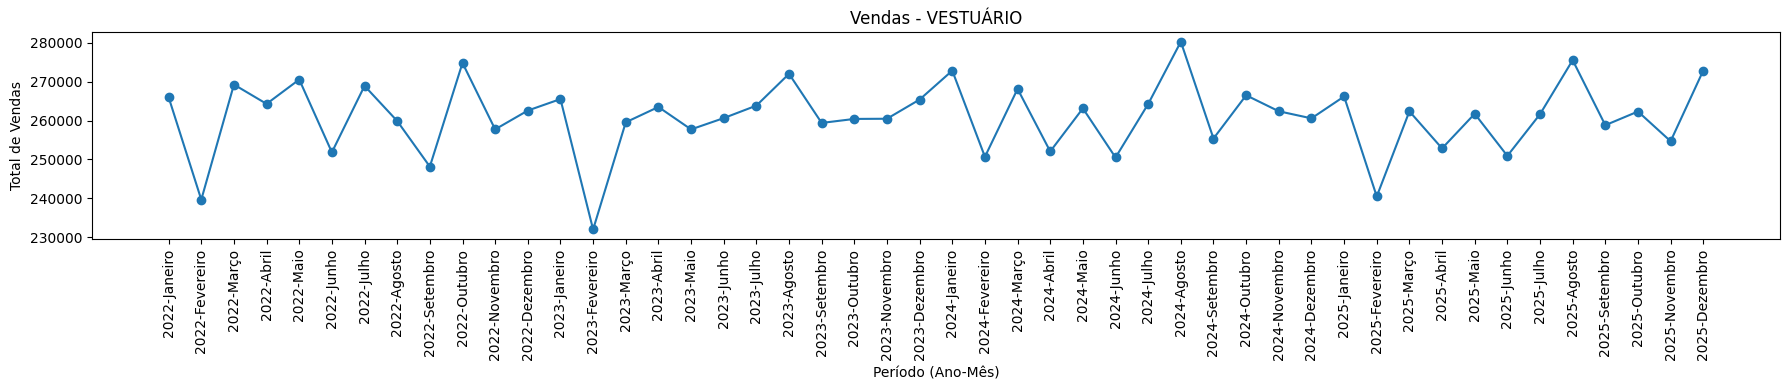

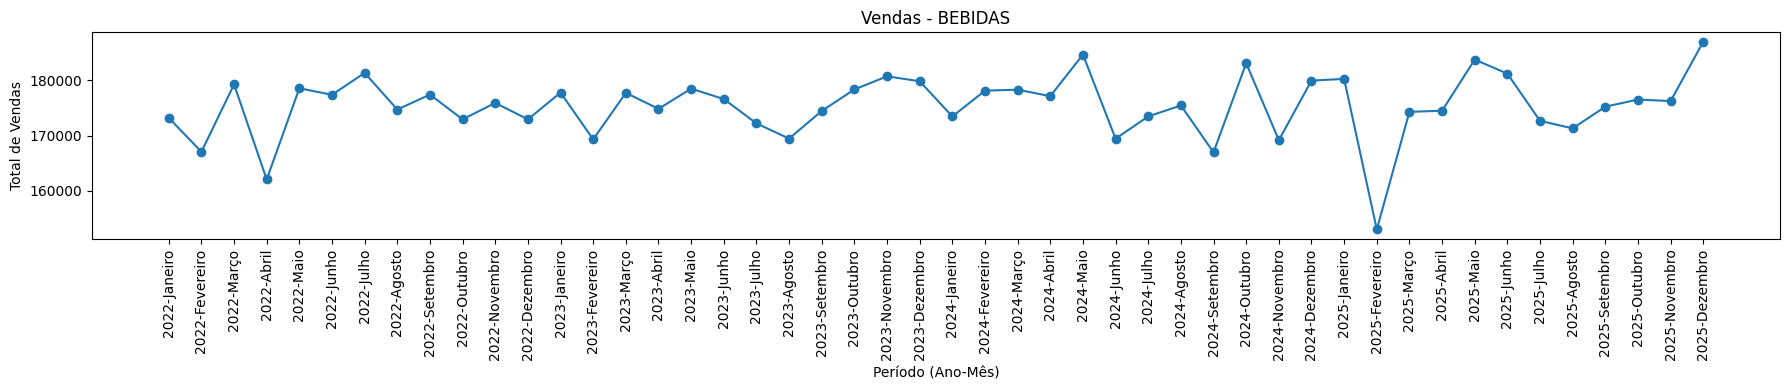

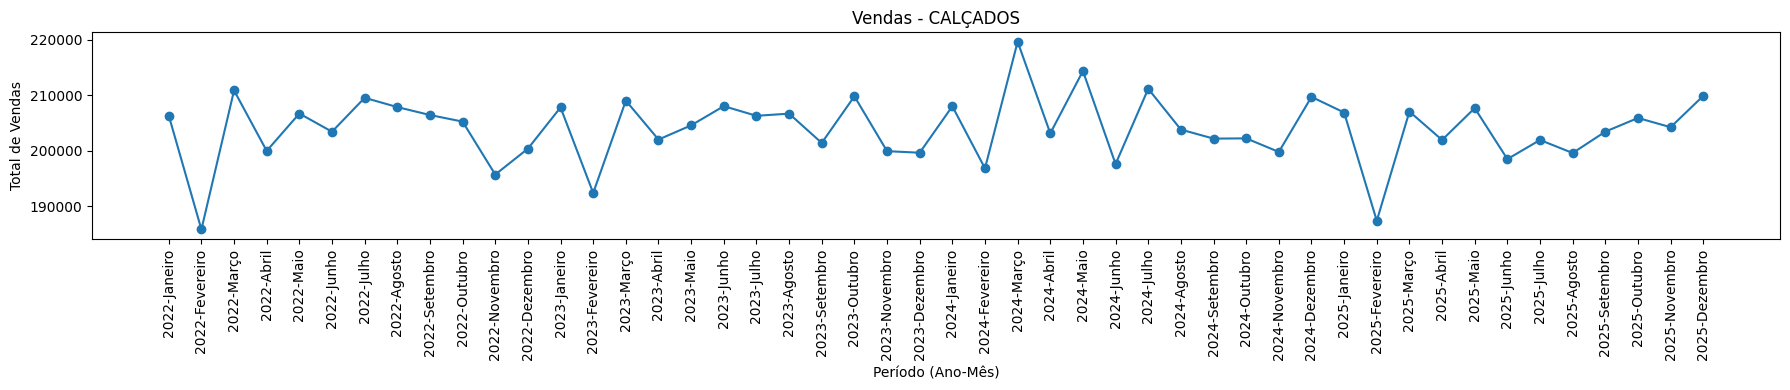

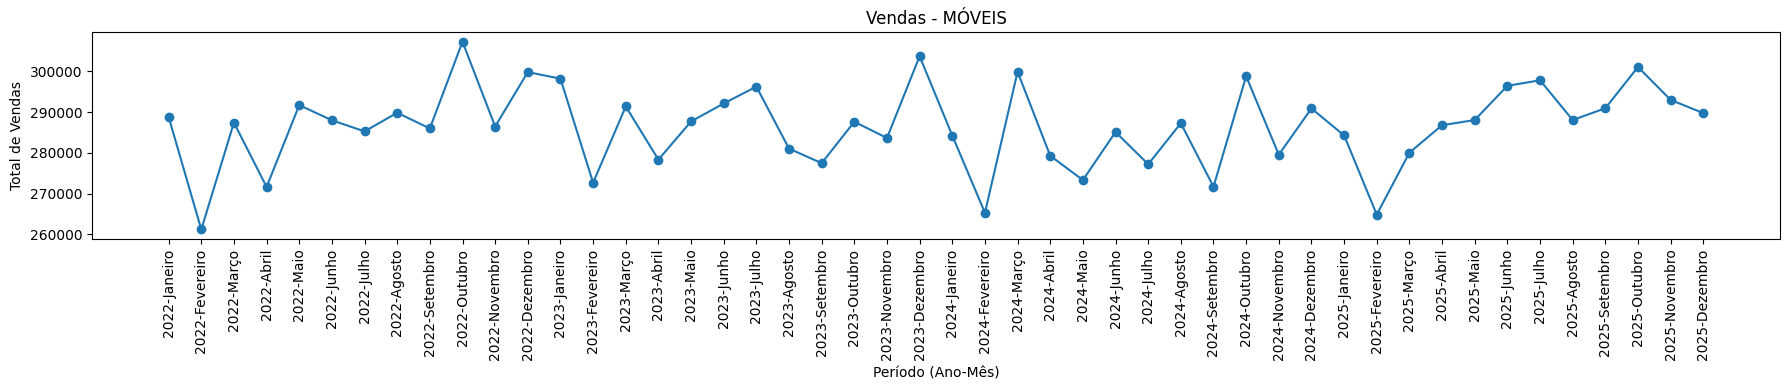

In [0]:
from pyspark.sql.functions import sum, col, desc, row_number, round, when
import matplotlib.pyplot as plt
from pyspark.sql.window import Window
from pyspark.sql.functions import lit

# Tabela fato_vendas 
fato_vendas = "dataexperts.gold.fato_vendas"
dim_categoria  = "dataexperts.gold.dim_categoria_produto"

# Seleção da categoria e de sua respectiva sk
categoria_produto = (
    spark.table(dim_categoria)
         .select("categoria_nome", "sk_categoria")
         .distinct()
)

# Seleção de vendas totais por categoria em função de ano/mes
vendas = (spark.table(fato_vendas)
                    .groupBy("ano", "mes", "sk_categoria")
                    .agg(sum("valor_total").alias("total_vendas"))  
                )

vendas = (vendas.join(categoria_produto.select("sk_categoria", "categoria_nome"), on="sk_categoria").drop("sk_categoria"))

# Separacao por categoria
for categoria in categoria_produto.select("categoria_nome").collect():
    vendas = vendas.withColumn(
        "mes_num",
        when(col("mes") == "Janeiro", lit(1))
        .when(col("mes") == "Fevereiro", lit(2))
        .when(col("mes") == "Março", lit(3))
        .when(col("mes") == "Abril", lit(4))
        .when(col("mes") == "Maio", lit(5))
        .when(col("mes") == "Junho", lit(6))
        .when(col("mes") == "Julho", lit(7))
        .when(col("mes") == "Agosto", lit(8))
        .when(col("mes") == "Setembro", lit(9))
        .when(col("mes") == "Outubro", lit(10))
        .when(col("mes") == "Novembro", lit(11))
        .otherwise(lit(12))
    )

    vendas_categoria = (
        vendas
            .filter(col("categoria_nome") == categoria.categoria_nome)
            .orderBy("ano", "mes_num")
            .select("ano", "mes", "total_vendas")
            .collect()
    )
    
    if not vendas_categoria:
        continue

    x = [f"{r.ano}-{str(r.mes).zfill(2)}" for r in vendas_categoria]
    y = [r.total_vendas for r in vendas_categoria]

    # Plot
    plt.figure(figsize=(18, 4))
    plt.plot(x, y, marker="o")
    plt.title(f"Vendas - {categoria.categoria_nome}")
    plt.xlabel("Período (Ano-Mês)")
    plt.ylabel("Total de Vendas")
    plt.xticks(rotation=90)
    plt.tight_layout()

### Pergunta de negócio 02 - **_Quais os top 10 produtos por valor_total e sua participação no total?_**  


#### Contexto da Análise
A presente análise considera o período de 2022 a 2025 e tem como objetivo identificar a concentração de receita no portfólio de produtos. O conjunto de dados analisado possui um total de 300 produtos distribuídos em 12 categorias distintas. A partir desse universo, foram identificados os 10 produtos com maior valor total de vendas e calculada a participação percentual de cada um em relação ao faturamento total.

---

#### Top 10 Produtos por Valor Total de Vendas

A tabela a seguir apresenta os 10 produtos com maior volume de vendas no período analisado, bem como sua respectiva categoria, posição no ranking e participação percentual no faturamento total.

| vendas_produto | categoria_nome | produto_id | rank | participacao [%] |
|:---------------|:---------------|-----------:|-----:|-----------------:|
| 3.256.567,54 | MÓVEIS | 210 | 1 | 2,7763 |
| 1.677.591,52 | PET SHOP | 180 | 2 | 1,4302 |
| 1.407.906,61 | COSMÉTICOS | 114 | 3 | 1,2003 |
| 1.273.690,63 | ALIMENTOS | 221 | 4 | 1,0858 |
| 1.180.089,80 | CALÇADOS | 126 | 5 | 1,0060 |
| 1.178.400,20 | BEBIDAS | 235 | 6 | 1,0046 |
| 1.170.104,91 | CALÇADOS | 253 | 7 | 0,9975 |
| 1.160.444,48 | ELETRÔNICOS | 285 | 8 | 0,9893 |
| 1.023.096,95 | ELETRODOMÉSTICOS | 107 | 9 | 0,8722 |
| 1.011.737,04 | PET SHOP | 168 | 10 | 0,8625 |

---

#### Análise dos Resultados — Produtos

Os 10 produtos com maior volume de vendas representam, em conjunto, aproximadamente **12,22% do valor total de vendas** do período analisado. Considerando que o catálogo é composto por 300 produtos, esses 10 itens correspondem a cerca de **3,33% do total de produtos disponíveis**, evidenciando uma concentração relevante de receita em uma pequena parcela do portfólio.

Observa-se uma forte dependência dos primeiros colocados do ranking. O produto líder, pertencente à categoria MÓVEIS, apresenta um valor de vendas significativamente superior aos demais, com faturamento próximo ao dobro do segundo colocado. Além disso, os quatro primeiros produtos concentram uma fatia expressiva da receita quando comparados aos demais itens do top 10, indicando que o desempenho financeiro é fortemente influenciado por um número reduzido de produtos específicos.

Esse padrão sugere que variações na demanda ou disponibilidade desses produtos líderes podem impactar de forma relevante o faturamento total, caracterizando um cenário de concentração de risco em nível de produto.

---

#### Top 10 Categorias por Valor Total de Vendas

Para complementar a análise, a tabela abaixo apresenta as 10 categorias com maior volume de vendas no período, ordenadas de forma decrescente conforme o valor total vendido.

| vendas_categoria | categoria_nome | rank | participacao [%] |
|:-----------------|:---------------|-----:|-----------------:|
| 13.747.649,43 | MÓVEIS | 1 | 11,7201 |
| 13.507.209,10 | ELETRÔNICOS | 2 | 11,5151 |
| 12.689.065,09 | PET SHOP | 3 | 10,8176 |
| 12.520.767,87 | VESTUÁRIO | 4 | 10,6742 |
| 10.254.866,28 | BRINQUEDOS | 5 | 8,7424 |
| 9.888.162,75 | ALIMENTOS | 6 | 8,4298 |
| 9.789.202,16 | CALÇADOS | 7 | 8,3455 |
| 8.533.765,80 | ELETRODOMÉSTICOS | 8 | 7,2752 |
| 8.496.548,17 | COSMÉTICOS | 9 | 7,2434 |
| 8.417.702,24 | BEBIDAS | 10 | 7,1762 |

---

#### Análise dos Resultados — Categorias

Assim como observado na análise por produto, a categoria MÓVEIS se destaca como a principal responsável pelo faturamento, concentrando aproximadamente **11,72% da receita total**. No entanto, diferentemente do que ocorre no nível de produto, a distribuição do faturamento entre as categorias apresenta-se de forma mais equilibrada.

As três categorias mais representativas — MÓVEIS, ELETRÔNICOS e PET SHOP — somam pouco mais de **34% do faturamento total**, indicando que, embora existam categorias líderes, a receita está mais bem distribuída quando analisada sob essa perspectiva. Isso sugere que o risco de concentração é mais significativo no nível de produtos individuais do que no nível de categorias.

---

#### Conclusão

A análise evidencia que uma pequena parcela do portfólio de produtos é responsável por uma proporção relevante da receita total. Os 10 produtos mais vendidos, apesar de representarem apenas 3,33% do catálogo, concentram mais de 12% do faturamento, caracterizando uma forte concentração de valor. Em contrapartida, a análise por categoria demonstra uma distribuição mais homogênea da receita, com destaque para a categoria MÓVEIS.

Esses resultados reforçam a importância de estratégias de gestão focadas nos produtos líderes, ao mesmo tempo em que indicam oportunidades para diversificação da receita por meio do fortalecimento de produtos intermediários e de menor participação no faturamento total.


In [0]:
from pyspark.sql.functions import sum, col, desc, row_number, round
import matplotlib.pyplot as plt
from pyspark.sql.window import Window

fato_vendas = "dataexperts.gold.fato_vendas"
dim_categoria = "dataexperts.gold.dim_categoria_produto"
dim_produto = "dataexperts.gold.dim_produto"

# Tabelas
produtos = spark.table(dim_produto).select("sk_produto", "produto_id")
categorias = spark.table(dim_categoria).select("sk_categoria", "categoria_nome")

vendas_categoria = spark.table(fato_vendas).groupBy("sk_categoria").agg(sum("valor_total").alias("vendas_categoria"))
vendas_produtos = spark.table(fato_vendas).groupBy("sk_produto", "sk_categoria").agg(sum("valor_total").alias("vendas_produto"))

vendas_totais = vendas_categoria.agg(sum("vendas_categoria")).first()[0]

# Join para saber o id dos produtos e o nome das categorias
vendas_categoria = vendas_categoria.join(categorias.select("sk_categoria", "categoria_nome"), on="sk_categoria").drop("sk_categoria")

vendas_produtos = vendas_produtos.join(categorias.select("sk_categoria", "categoria_nome"), on="sk_categoria").drop("sk_categoria")
vendas_produtos = vendas_produtos.join(produtos.select("sk_produto", "produto_id"), on="sk_produto").drop("sk_produto")


# VENDAS POR PRODUTO (2022~2025)
produtos_rank = vendas_produtos.withColumn("rank", row_number().over(Window.orderBy(col("vendas_produto").desc())))

top_10 = produtos_rank.filter(col("rank") <= 10)
x = top_10.withColumn("participacao [%]", round((col("vendas_produto") * 100) / vendas_totais, 4) )

print("VENDAS POR PRODUTOS")
print("Número de categorias: ", categorias.count())
print("Número de produtos: ", produtos.count())

y = x.agg(sum("participacao [%]").alias("participacao [%]")).first()["participacao [%]"]
print(f"Top 10 produtos representam: {y}%")

x.show()

# VENDAS POR CATEGORIA (2022~2025)
categorias_rank = (
    vendas_categoria
        .withColumn("rank", row_number().over(Window.orderBy(col("vendas_categoria").desc())))
)

top_10 = categorias_rank.filter(col("rank") <= 10)
x = top_10.withColumn("participacao [%]", round((col("vendas_categoria") * 100) / vendas_totais, 4) )
print("VENDAS POR CATEGORIA")
x.show()




VENDAS POR PRODUTOS
Número de categorias:  12
Número de produtos:  300


/databricks/python/lib/python3.12/site-packages/pyspark/sql/connect/expressions.py:1134: UserWarning: WARN WindowExpression: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
  warnings.warn(


Top 10 produtos representam: 12.2247%
+------------------+----------------+----------+----+----------------+
|    vendas_produto|  categoria_nome|produto_id|rank|participacao [%]|
+------------------+----------------+----------+----+----------------+
|3256567.5400000014|          MÓVEIS|       210|   1|          2.7763|
|        1677591.52|        PET SHOP|       180|   2|          1.4302|
|1407906.6099999996|      COSMÉTICOS|       114|   3|          1.2003|
|1273690.6299999983|       ALIMENTOS|       221|   4|          1.0858|
|1180089.7999999993|        CALÇADOS|       126|   5|           1.006|
|         1178400.2|         BEBIDAS|       235|   6|          1.0046|
|1170104.9100000006|        CALÇADOS|       253|   7|          0.9975|
|1160444.4799999993|     ELETRÔNICOS|       285|   8|          0.9893|
|1023096.9500000004|ELETRODOMÉSTICOS|       107|   9|          0.8722|
|1011737.0400000011|        PET SHOP|       168|  10|          0.8625|
+------------------+----------------+--

### Pergunta de negócio 03 - **_Quais localidades (UF/cidade) apresentam maior ticket médio?_**

#### Contexto da Análise
Esta análise tem como objetivo identificar localidades com maior ticket médio, considerando a **média do valor total por pedido (ou por cliente)**, agrupada por **Unidade Federativa (UF)** e **cidade**. O ticket médio é um indicador estratégico para compreender o potencial de consumo, identificar mercados premium e mapear oportunidades regionais para expansão, precificação e direcionamento de campanhas comerciais.

A análise foi conduzida em dois níveis:
- **Macro**: avaliação do ticket médio por UF e por grandes regiões
- **Micro**: avaliação do ticket médio por cidade, permitindo identificar polos locais de consumo elevado

---

#### Ranking de UFs por Ticket Médio

A tabela a seguir apresenta as Unidades Federativas ordenadas de acordo com sua participação percentual no ticket médio.

| estado_venda | participacao [%] | rank |
|:--------------|-----------------:|-----:|
| SP | 12,6517 | 1 |
| RJ | 8,0428 | 2 |
| BA | 6,9258 | 3 |
| SC | 6,9093 | 4 |
| MG | 6,8967 | 5 |
| PR | 6,8896 | 6 |
| RS | 6,8574 | 7 |
| PE | 4,6001 | 8 |
| CE | 4,5898 | 9 |
| PA | 3,4684 | 10 |
| GO | 3,4456 | 11 |
| ES | 3,4430 | 12 |
| RO | 2,3162 | 13 |
| RN | 2,3118 | 14 |
| MS | 2,3029 | 15 |
| AM | 2,2961 | 16 |
| AL | 2,2946 | 17 |
| PI | 2,2899 | 18 |
| MA | 2,2898 | 19 |
| PB | 2,2776 | 20 |

---

#### Análise dos Resultados — Unidades Federativas

Os resultados demonstram que **São Paulo (SP)** lidera o ranking de ticket médio, destacando-se como o principal mercado premium do país. Em seguida, aparecem **Rio de Janeiro (RJ)** e **Bahia (BA)**, indicando que tanto grandes centros econômicos quanto estados com forte dinamismo regional apresentam elevado valor médio por pedido.

A região **Sul** (SC, PR e RS) apresenta tickets médios bastante próximos entre si, sugerindo um comportamento de consumo mais homogêneo, enquanto estados das regiões Norte e parte do Nordeste aparecem com valores médios inferiores, refletindo diferenças estruturais de renda, densidade urbana e perfil de consumo.

---

#### Ranking de Cidades por Ticket Médio

A análise em nível de cidade permite identificar polos locais de alto valor médio por pedido. A tabela abaixo apresenta as 20 cidades com maior ticket médio no período analisado.

| total_vendas_localidade | cidade_venda | estado_venda | media_vendas | participacao [%] | rank |
|-----------------------:|:-------------|:-------------|-------------:|-----------------:|-----:|
| 1.384.370,76 | Caruaru | PE | 0,011802 | 1,1802 | 1 |
| 1.382.545,08 | Brasília | DF | 0,011786 | 1,1786 | 2 |
| 1.372.844,68 | Osasco | SP | 0,011704 | 1,1704 | 3 |
| 1.372.036,22 | Feira de Santana | BA | 0,011697 | 1,1697 | 4 |
| 1.370.535,17 | Ji-Paraná | RO | 0,011684 | 1,1684 | 5 |
| 1.369.440,82 | Juiz de Fora | MG | 0,011675 | 1,1675 | 6 |
| 1.369.359,16 | São José dos Campos | SP | 0,011674 | 1,1674 | 7 |
| 1.368.605,57 | Novo Hamburgo | RS | 0,011668 | 1,1668 | 8 |
| 1.367.634,62 | Blumenau | SC | 0,011659 | 1,1659 | 9 |
| 1.366.568,57 | Volta Redonda | RJ | 0,011650 | 1,1650 | 10 |
| 1.364.721,40 | Macapá | AP | 0,011634 | 1,1634 | 11 |
| 1.362.649,60 | Mossoró | RN | 0,011617 | 1,1617 | 12 |
| 1.361.651,69 | Santos | SP | 0,011608 | 1,1608 | 13 |
| 1.360.476,19 | Niterói | RJ | 0,011598 | 1,1598 | 14 |
| 1.359.537,89 | Vila Velha | ES | 0,011590 | 1,1590 | 15 |
| 1.359.191,83 | Ilhéus | BA | 0,011587 | 1,1587 | 16 |
| 1.359.162,54 | Lauro de Freitas | BA | 0,011587 | 1,1587 | 17 |
| 1.358.563,25 | Belém | PA | 0,011582 | 1,1582 | 18 |
| 1.358.307,79 | Boa Vista | RR | 0,011580 | 1,1580 | 19 |
| 1.357.945,69 | Criciúma | SC | 0,011577 | 1,1577 | 20 |

---

#### Análise dos Resultados — Cidades

A análise por cidade revela que **altos tickets médios não estão restritos apenas às capitais ou aos maiores centros econômicos do país**. Cidades de porte médio, como **Caruaru (PE)**, **Feira de Santana (BA)**, **Juiz de Fora (MG)** e **Blumenau (SC)**, figuram entre os maiores tickets médios, indicando polos regionais de consumo com forte potencial de valor agregado.

Além disso, observa-se a presença recorrente de cidades localizadas em estados líderes no ranking por UF, como São Paulo, Rio de Janeiro e Bahia, reforçando a coerência entre o desempenho estadual e o desempenho municipal. Por outro lado, a presença de cidades como **Ji-Paraná (RO)**, **Macapá (AP)** e **Boa Vista (RR)** evidencia oportunidades de nicho em regiões menos populosas, mas com comportamento de consumo diferenciado.

---

#### Ticket Médio por Região

A consolidação dos resultados por grandes regiões apresenta o seguinte cenário:

- **Sudeste:** 27,59  
- **Nordeste:** 27,58  
- **Sul:** 20,66  
- **Norte:** 11,53  
- **Centro-Oeste:** 9,20  

---

#### Análise Regional

As regiões **Sudeste** e **Nordeste** apresentam os maiores valores agregados de ticket médio. No Sudeste, o desempenho é impulsionado principalmente por São Paulo e Rio de Janeiro, com destaque para cidades economicamente dinâmicas e de alta densidade urbana. No Nordeste, o resultado reflete a relevância de polos regionais fora das capitais, como Caruaru e Feira de Santana, que apresentam comportamento de consumo comparável a grandes centros.

A região **Sul** mantém uma posição intermediária, com padrões consistentes de consumo e menor volatilidade entre cidades. Já as regiões **Norte** e **Centro-Oeste**, embora apresentem tickets médios menores no agregado, demonstram potencial estratégico quando analisadas em nível municipal, especialmente em cidades específicas com maior valor médio por pedido.

---

#### Insights de Negócio

A análise evidencia a existência de **mercados premium distribuídos de forma descentralizada**, indo além das capitais tradicionais. Esse padrão sugere oportunidades estratégicas como:

- Direcionamento de produtos de maior valor agregado para cidades de porte médio com alto ticket médio;
- Estruturação de campanhas regionais personalizadas, focadas em polos locais de consumo;
- Uso do ticket médio como critério complementar ao volume de vendas para definição de prioridades comerciais;
- Expansão controlada em regiões menos exploradas, aproveitando cidades com comportamento de consumo acima da média regional.

Além disso, a dispersão geográfica dos altos tickets médios reduz o risco de dependência exclusiva de grandes capitais, permitindo estratégias de crescimento mais equilibradas e resilientes.

---

## Conclusão

Os resultados demonstram que o ticket médio varia significativamente entre estados e, principalmente, entre cidades. Embora estados como São Paulo e Rio de Janeiro se destaquem no nível macro, a análise em nível municipal revela oportunidades relevantes em cidades médias e polos regionais. Essa visão integrada entre UF e cidade fornece uma base sólida para decisões estratégicas de expansão, segmentação de mercado e maximização do valor por cliente.




In [0]:
from pyspark.sql.functions import sum, col, desc, row_number, round
import matplotlib.pyplot as plt
from pyspark.sql.window import Window

dim_localidade = "dataexperts.gold.dim_localidade"
fato_vendas = "dataexperts.gold.fato_vendas"

localidades = spark.table(dim_localidade).select("cidade_venda", "estado_venda", "sk_localidade")

vendas_parciais = (spark.table(fato_vendas)
                    .filter(col("sk_localidade").isNotNull())
                    .groupBy("sk_localidade")
                    .agg(sum("valor_total").alias("total_vendas_localidade"))  
                  )

vendas_parciais = vendas_parciais.join(localidades, on="sk_localidade", how="inner").drop("sk_localidade")

vendas_totais = vendas_parciais.agg(sum("total_vendas_localidade").alias("vendas")).first()["vendas"]

media_vendas = vendas_parciais\
                  .withColumn("media_vendas", round(col("total_vendas_localidade")/vendas_totais,6))\
                  .withColumn("participacao[%]", round((col("total_vendas_localidade")*100)/vendas_totais,6))

maiores_tickets = (
    media_vendas
        .withColumn("rank", row_number().over(Window.orderBy(col("media_vendas").desc())))
)

maiores_tickets_localidade = maiores_tickets.filter(col("rank") <= 20)

maiores_tickets_localidade.show()

estados = media_vendas.groupBy("estado_venda").agg(sum("participacao[%]"))
estados = estados.withColumn("participacao[%]", round(col("sum(participacao[%])"),6)).drop("sum(participacao[%])")
estados_tickets = estados.withColumn("rank", row_number().over(Window.orderBy(col("participacao[%]").desc())))
estados_tickets.show()

sudeste= (
    estados_tickets
    .filter(col("estado_venda").isin(["SP", "RJ", "MG"]))
    .agg(sum(col("participacao[%]")))
).collect()[0][0]

sul = (
    estados_tickets
    .filter(col("estado_venda").isin(["PR", "SC", "RS"]))
    .agg(sum(col("participacao[%]")))
).collect()[0][0]

centro_oeste = (
    estados_tickets
    .filter(col("estado_venda").isin(["MT","GO","MS","DF"]))
    .agg(sum(col("participacao[%]")))
).collect()[0][0]

norte = (
    estados_tickets
    .filter(col("estado_venda").isin(["AC","AP","AM","PA","RO","RR","TO"]))
    .agg(sum(col("participacao[%]")))
).collect()[0][0]

nordeste = (
    estados_tickets
    .filter(col("estado_venda").isin(["CE","MA","PI","RN","PE","PB","AL","SE","BA"]))
    .agg(sum(col("participacao[%]")))
).collect()[0][0]

print(f"Sudeste: {sudeste}")
print(f"Sul: {sul}")
print(f"Centro-Oeste: {centro_oeste}")
print(f"Norte: {norte}")
print(f"Nordeste: {nordeste}")

/databricks/python/lib/python3.12/site-packages/pyspark/sql/connect/expressions.py:1134: UserWarning: WARN WindowExpression: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
  warnings.warn(


+-----------------------+-------------------+------------+------------+---------------+----+
|total_vendas_localidade|       cidade_venda|estado_venda|media_vendas|participacao[%]|rank|
+-----------------------+-------------------+------------+------------+---------------+----+
|     1384370.7600000007|            Caruaru|          PE|    0.011802|       1.180198|   1|
|     1382545.0800000012|           Brasília|          DF|    0.011786|       1.178642|   2|
|      1372844.680000001|             Osasco|          SP|    0.011704|       1.170372|   3|
|     1372036.2199999993|   Feira De Santana|          BA|    0.011697|       1.169683|   4|
|     1370535.1699999992|          Ji-paraná|          RO|    0.011684|       1.168403|   5|
|     1369440.8199999984|       Juiz De Fora|          MG|    0.011675|        1.16747|   6|
|     1369359.1599999985|São José Dos Campos|          SP|    0.011674|       1.167401|   7|
|     1368605.5699999998|      Novo Hamburgo|          RS|    0.011668

### Pergunta de Negócio 04 - **_Como a quantidade média por transação varia por categoria e por ano?_**

%md
#### Contexto da Análise
Esta análise tem como objetivo compreender **como a quantidade média de itens por transação varia por categoria ao longo do tempo**, considerando o período de **2022 a 2025**. A métrica analisada corresponde à **média de quantidade por pedido**, agrupada por **categoria de produto** e por **ano**, sendo um indicador fundamental para identificar mudanças no comportamento de compra dos clientes, como a formação de **cestas maiores ou menores** ao longo do tempo.

Essa análise permite avaliar se os consumidores passaram a concentrar mais itens em uma única compra (packs maiores) ou se mantiveram — ou reduziram — o volume médio de itens por transação, refletindo hábitos de consumo, estratégias promocionais e maturidade do portfólio.

---

#### Quantidade Média por Transação — Visão Geral por Categoria e Ano

A tabela a seguir apresenta a quantidade média de itens por transação para cada categoria, ao longo dos anos analisados.

| categoria_nome | 2022 | 2023 | 2024 | 2025 |
|:----------------|-----:|-----:|-----:|-----:|
| ALIMENTOS | 1,85 | 1,84 | 1,86 | 1,85 |
| BEBIDAS | 1,85 | 1,85 | 1,86 | 1,85 |
| BRINQUEDOS | 1,87 | 1,85 | 1,85 | 1,84 |
| CALÇADOS | 1,85 | 1,85 | 1,86 | 1,85 |
| COSMÉTICOS | 1,85 | 1,85 | 1,85 | 1,84 |
| ELETRODOMÉSTICOS | 1,85 | 1,85 | 1,85 | 1,85 |
| ELETRÔNICOS | 1,85 | 1,85 | 1,85 | 1,85 |
| ESPORTES | 1,86 | 1,85 | 1,85 | 1,85 |
| MÓVEIS | 1,84 | 1,85 | 1,85 | 1,85 |
| PAPELARIA | 1,85 | 1,85 | 1,85 | 1,85 |
| PET SHOP | 1,85 | 1,85 | 1,86 | 1,84 |
| VESTUÁRIO | 1,85 | 1,85 | 1,85 | 1,84 |

---

#### Análise dos Resultados — Evolução Temporal

Os dados evidenciam um **comportamento extremamente estável da quantidade média por transação** em todas as categorias ao longo do período analisado. As médias permanecem concentradas em um intervalo muito estreito, variando aproximadamente entre **1,84 e 1,87 itens por pedido**, sem oscilações relevantes entre os anos.

Essa estabilidade indica que, entre 2022 e 2025, **não houve mudanças estruturais no tamanho médio das cestas de compra**, sugerindo que os consumidores mantiveram hábitos consistentes quanto ao número de itens adquiridos por transação, independentemente da categoria.

Observa-se um **leve aumento pontual em 2024** em algumas categorias, como **Alimentos, Bebidas, Calçados e Pet Shop**, com médias próximas de 1,86. Embora estatisticamente pequeno, esse movimento pode indicar **compras ligeiramente mais concentradas naquele ano**, possivelmente associadas a ações promocionais, ajustes temporários de preços ou antecipação de consumo.

Por outro lado, em **2025**, nota-se uma **leve redução da média** em categorias como **Brinquedos, Cosméticos, Pet Shop e Vestuário**, retornando a valores próximos de 1,84. Esse comportamento sugere uma possível **fragmentação marginal das compras**, com maior frequência de pedidos unitários ou menor agregação de itens por transação, ainda que sem impacto relevante no padrão geral.

---

#### Análise por Perfil de Categoria

Categorias de **consumo recorrente**, como **Alimentos, Bebidas, Pet Shop e Papelaria**, apresentam médias consistentemente próximas de 1,85 ao longo de todos os anos. Esse padrão indica compras frequentes, porém com **baixo volume de itens por pedido**, refletindo reposições regulares e comportamento previsível de consumo.

Já categorias de **maior valor agregado**, como **Eletrodomésticos, Eletrônicos e Móveis**, mantêm médias igualmente estáveis e levemente inferiores ou iguais às demais. Esse comportamento é coerente com a natureza desses produtos, nos quais a compra tende a ser **unitária**, com menor probabilidade de múltiplos itens em uma mesma transação.

Categorias como **Brinquedos e Vestuário**, que tradicionalmente poderiam apresentar maior variabilidade, também demonstram estabilidade, indicando que **o crescimento de vendas nesses segmentos está mais associado à frequência de compra ou ao valor dos itens**, e não ao aumento da quantidade por pedido.

---

#### Insights de Negócio

A análise revela que, no período analisado, **não houve evidência de mudança relevante no comportamento de compra em termos de volume por transação**. O crescimento ou retração do faturamento, portanto, tende a estar mais relacionado a fatores como:

- Aumento do valor médio dos produtos;
- Maior frequência de compra;
- Expansão da base de clientes;
- Sazonalidade e mix de categorias.

Esse cenário destaca uma **oportunidade estratégica clara** para o negócio: a implementação de ações voltadas ao aumento da quantidade média por pedido, como:

- Criação de kits e bundles de produtos;
- Descontos progressivos por quantidade;
- Estratégias de cross-sell e recomendações inteligentes;
- Incentivos para compras múltiplas em categorias recorrentes.

---

#### Conclusão

Os resultados demonstram que a quantidade média por transação permaneceu **estável entre 2022 e 2025**, sem indícios de migração significativa para cestas maiores ou menores em nenhuma das categorias analisadas. Esse comportamento sugere um padrão de consumo consolidado, no qual o crescimento do negócio depende menos do aumento do volume por pedido e mais de estratégias focadas em valor, frequência e mix de produtos. A análise fornece uma base sólida para decisões voltadas à otimização do ticket médio por meio de estratégias comerciais e promocionais orientadas ao aumento da cesta de compras.


In [0]:
from pyspark.sql.functions import avg, col, round
from pyspark.sql.window import Window
import matplotlib.pyplot as plt

fato_vendas = "dataexperts.gold.fato_vendas"
dim_categoria = "dataexperts.gold.dim_categoria_produto"

vendas = (
    spark.table(fato_vendas)
         .select("quantidade", "sk_categoria", "ano")
)

categorias = (
    spark.table(dim_categoria)
         .select("sk_categoria", "categoria_nome")
)

anos = [2022, 2023, 2024, 2025]

# Join de vendas e categorias
base_analitica = (
    vendas
        .filter(col("ano").isin(anos))
        .join(categorias, on="sk_categoria", how="inner")
)

# Calculando a média por categoria e ano
media_quantidade_categoria_ano = (
    base_analitica
        .groupBy("categoria_nome", "ano")
        .agg(
            round(avg("quantidade"), 2)
            .alias("media_quantidade_por_transacao")
        )
        .orderBy("categoria_nome", "ano")
)

# Transformando em tabela mais compreensível
media_quantidade_pivot = (
    media_quantidade_categoria_ano
        .groupBy("categoria_nome")
        .pivot("ano")
        .agg(round(avg("media_quantidade_por_transacao"), 2))
        .orderBy("categoria_nome")
)

# Visualização em tabelas
display(media_quantidade_pivot)

categoria_nome 2022 2023 2024 2025 ALIMENTOS 1.85 1.84 1.86 1.85 BEBIDAS 1.85 1.85 1.86 1.85 BRINQUEDOS 1.87 1.85 1.85 1.84 CALÇADOS 1.85 1.85 1.86 1.85 COSMÉTICOS 1.85 1.85 1.85 1.84 ELETRODOMÉSTICOS 1.85 1.85 1.85 1.85 ELETRÔNICOS 1.85 1.85 1.85 1.85 ESPORTES 1.86 1.85 1.85 1.85 MÓVEIS 1.84 1.85 1.85 1.85 PAPELARIA 1.85 1.85 1.85 1.85 PET SHOP 1.85 1.85 1.86 1.84 VESTUÁRIO 1.85 1.85 1.85 1.84

###  Pergunta de Negócio 05 - **_Quais clientes são responsáveis por 80% do faturamento (curva ABC)?_**


#### Contexto da Análise
Esta análise tem como objetivo identificar os clientes que concentram a maior parcela do faturamento, por meio da aplicação da **Curva ABC**.

Com base no percentual acumulado, os clientes são classificados em três grupos:
- **Classe A:** clientes responsáveis por até 80% do faturamento
- **Classe B:** clientes responsáveis pelo faturamento entre 80% e 95%
- **Classe C:** clientes responsáveis pelos 5% finais do faturamento

O conjunto de dados analisado possui **1.000 clientes**, sendo que a tabela a seguir apresenta apenas as **20 primeiras linhas**, correspondentes aos clientes com maior contribuição individual de receita.

---

#### Top Clientes por Valor Total de Vendas

A tabela abaixo apresenta os clientes com maior valor total de vendas, ordenados de forma decrescente, bem como seu percentual de participação e percentual acumulado no faturamento total.

| valor_total | nome_cliente | porcento | percent_acumulado | abc |
|------------:|:-------------|---------:|------------------:|:---:|
| 128.351,29 | Cliente 0362 | 0,1094 | 0,1094 | A |
| 127.574,28 | Cliente 0278 | 0,1088 | 0,2182 | A |
| 126.966,73 | Cliente 0099 | 0,1082 | 0,3264 | A |
| 126.916,01 | Cliente 0019 | 0,1082 | 0,4346 | A |
| 126.881,70 | Cliente 0936 | 0,1082 | 0,5428 | A |
| 126.595,85 | Cliente 0869 | 0,1079 | 0,6507 | A |
| 126.489,73 | Cliente 0146 | 0,1078 | 0,7585 | A |
| 126.441,51 | Cliente 0228 | 0,1078 | 0,8663 | A |
| 126.433,47 | Cliente 0057 | 0,1078 | 0,9741 | A |
| 126.393,59 | Cliente 0471 | 0,1078 | 1,0819 | A |
| 126.267,57 | Cliente 0585 | 0,1076 | 1,1895 | A |
| 126.265,96 | Cliente 0691 | 0,1076 | 1,2972 | A |
| 125.957,74 | Cliente 0985 | 0,1074 | 1,4046 | A |
| 125.692,79 | Cliente 0356 | 0,1072 | 1,5117 | A |
| 125.565,92 | Cliente 0571 | 0,1070 | 1,6188 | A |
| 125.401,61 | Cliente 0612 | 0,1069 | 1,7257 | A |
| 125.339,00 | Cliente 0209 | 0,1069 | 1,8325 | A |
| 125.291,80 | Cliente 0806 | 0,1068 | 1,9393 | A |
| 125.093,88 | Cliente 0076 | 0,1066 | 2,0460 | A |
| 124.932,06 | Cliente 0917 | 0,1065 | 2,1525 | A |

---

#### Observação sobre o Conjunto de Clientes

Embora apenas 20 registros estejam apresentados na tabela acima, a base completa contém **1.000 clientes**. A classificação ABC foi aplicada considerando todo o conjunto, e não apenas os clientes exibidos. Os clientes da **Classe A** são aqueles que, de forma acumulada, concentram aproximadamente **80% do faturamento total**, conforme demonstrado na curva ABC.

Sobre esse pequeno conjunto, é possível notar que os 20 maiores clientes entre 2022 à 2025 gastaram quantidades muito proximas. 

---

#### Análise da Curva ABC

O gráfico da Curva ABC, apresentado no notebook, evidencia de forma clara o comportamento do faturamento da loja no período analisado. Observa-se que os gastos dos clientes apresentam um padrão bastante semelhante, com valores muito próximos entre si. A diferença entre o maior e o menor gasto registrado no período variou aproximadamente entre R$ 20.000,00 e R$ 25.000,00, o que indica uma baixa dispersão dos valores de faturamento individual.

Dessa forma, como os gastos dos clientes são relativamente homogêneos, não há uma forte concentração do faturamento em poucos clientes. Consequentemente, um número maior de clientes é necessário para compor 80% do faturamento total da loja, característica típica de um cenário em que a Curva ABC não apresenta uma separação acentuada entre as classes A, B e C.

Essa análise indica que o faturamento está distribuído de maneira mais equilibrada entre os clientes, reduzindo a dependência de poucos consumidores com gastos significativamente superiores aos demais.



In [0]:
from pyspark.sql.functions import sum, col, desc, row_number, round, when
import matplotlib.pyplot as plt
from pyspark.sql.window import Window

# Importação das tabelas
fato_vendas = "dataexperts.gold.fato_vendas"
dim_clientes = "dataexperts.gold.dim_cliente"

vendas = spark.table(fato_vendas).groupBy("sk_cliente").agg(sum("valor_total").alias("valor_total"))
clientes = spark.table(dim_clientes).select("sk_cliente", "nome_cliente")
vendas = vendas.join(clientes.select("sk_cliente", "nome_cliente"), on="sk_cliente", how="inner").drop("sk_cliente")

# Calculos
vendas_totais = vendas.agg(sum("valor_total")).first()[0]

vendas = vendas.withColumn("porcento", (col("valor_total")*100/vendas_totais))
vendas = vendas.orderBy(col("porcento").desc())

window = Window.orderBy(desc("valor_total")).rowsBetween(Window.unboundedPreceding, 0)

vendas = vendas.withColumn("percent_acumulado", sum("porcento").over(window))

vendas = vendas.withColumn("abc", when(col("percent_acumulado")<= 80, "A")\
                                    .when((col("percent_acumulado")>80) & (col("percent_acumulado")<=95), "B")\
                                    .otherwise("C"))

vendas.show()



/databricks/python/lib/python3.12/site-packages/pyspark/sql/connect/expressions.py:1134: UserWarning: WARN WindowExpression: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
  warnings.warn(


+------------------+------------+-------------------+-------------------+---+
|       valor_total|nome_cliente|           porcento|  percent_acumulado|abc|
+------------------+------------+-------------------+-------------------+---+
|         128351.29|Cliente 0362|0.10942152057865048|0.10942152057865048|  A|
|         127574.28|Cliente 0278| 0.1087591071685101|0.21818062774716057|  A|
|         126966.73|Cliente 0099| 0.1082411611094751|0.32642178885663564|  A|
|126916.01000000001|Cliente 0019|0.10819792150102435|   0.43461971035766|  A|
|126881.69999999995|Cliente 0936|0.10816867167914053| 0.5427883820368006|  A|
|126595.84999999998|Cliente 0869|0.10792497999783834| 0.6507133620346389|  A|
|126489.73000000003|Cliente 0146|0.10783451100634008|  0.758547873040979|  A|
|126441.50999999995|Cliente 0228|0.10779340268773797|  0.866341275728717|  A|
|126433.47000000003|Cliente 0057|0.10778654845958457| 0.9741278241883016|  A|
|126393.59000000001|Cliente 0471|0.10775255012391784| 1.08188037

/databricks/python/lib/python3.12/site-packages/pyspark/sql/connect/expressions.py:1134: UserWarning: WARN WindowExpression: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
  warnings.warn(


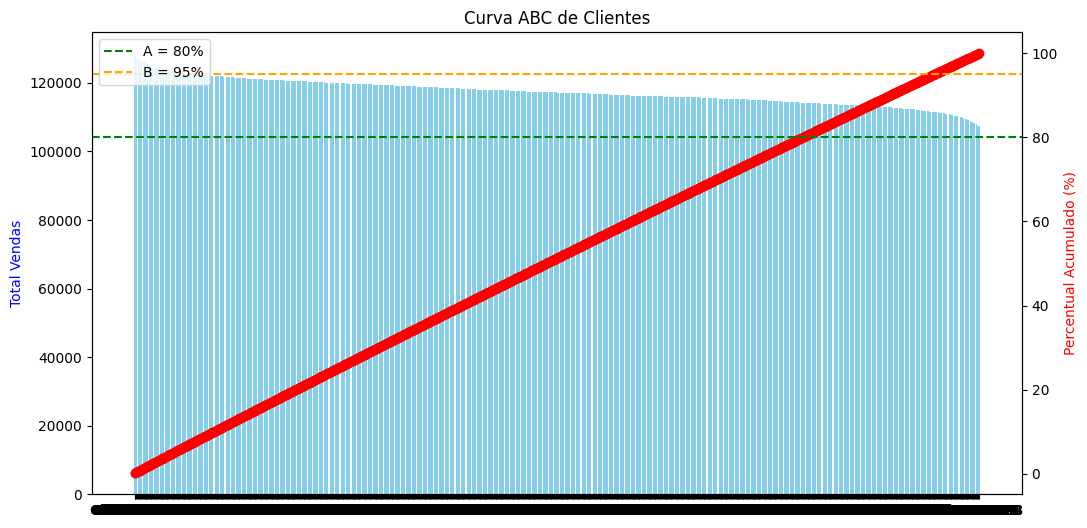

In [0]:

# Grafico de Pareto
fig, ax1 = plt.subplots(figsize=(12,6))
df = vendas.toPandas()

# Dominio, clientes 
ax1.bar(df['nome_cliente'], df['valor_total'], color='skyblue')

# Imagem
ax1.set_ylabel('Total Vendas', color='blue')

# Linha do percentual acumulado
ax2 = ax1.twinx()
ax2.plot(df['nome_cliente'], df['percent_acumulado'], color='red', marker='o', linewidth=1)
ax2.set_ylabel('Percentual Acumulado (%)', color='red')

#Limites ABC
ax2.axhline(80, color='green', linestyle='--', label='A = 80%')
ax2.axhline(95, color='orange', linestyle='--', label='B = 95%')

# Infos
ax2.legend(loc='upper left')
plt.title('Curva ABC de Clientes')
plt.show()

/databricks/python/lib/python3.12/site-packages/pyspark/sql/connect/expressions.py:1134: UserWarning: WARN WindowExpression: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
  warnings.warn(


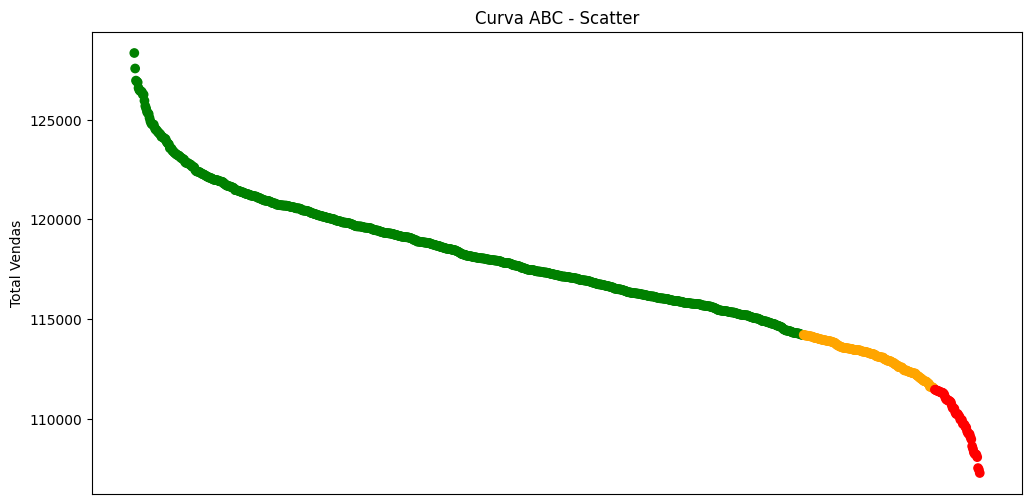

In [0]:
df = vendas.toPandas()

mapa_cores = {'A': 'green', 'B': 'orange', 'C': 'red'}
colors = df['abc'].map(mapa_cores)

plt.figure(figsize=(12,6))
plt.scatter(df['nome_cliente'], df['valor_total'], c=colors)
plt.xticks([])
plt.ylabel('Total Vendas')
plt.title('Curva ABC - Scatter')
plt.show()

---
---

<br><br><br><br><br>

# **ETAPA 6 - AGENTE DE IA PARA ANÁLISES AD-HOC**

---
---

<br>

Essa etapa será responsável por criar uma versão de um modelo de Agente de IA criado manualmente pela plataforma do databricks, carregá-lo com os dados que tivemos como resultado nas etapas anteriores e então proporcionar outras possíveis análises ad-hoc's que possam surgir.

*`Complete as informações necessárias nos trechos que estão destacados em vermelho assim como esse, seguindo o padrão snake_case.`*

<br><br>

---
---

### Parte 1 - **Criação do modelo do agente**

Para criação e utilização do Agente, é necessário pela plaformar seguir os passo:
1. Na aba lateral clicar em _Experiments_
2. Clicar em _GenAI apps & agents_
3. Colocar o nome *dataexpert_agent* como nome do agente e clica em criar.
5. Completar a variável EXPERIMENT_ID com o código que está nos detalhes do modelo.
4. Rodar o notebook
4. Acontecerá um erro de versão não encontrada, portanto só colocar *somente_tabela_fato_venda* no alias para identificar a versão certa do modelo que foi criado lá no workspace no schema *default*.

In [0]:
import mlflow
from mlflow.pyfunc import PythonModel
from mlflow.models.signature import ModelSignature
from mlflow.types.schema import Schema, ColSpec
from mlflow.deployments import get_deploy_client

EXPERIMENT_ID = "93663703526355"
MODEL_NAME = "dataexpert_agent"
LLM_ENDPOINT = "databricks-llama-4-maverick"

CATALOG = "dataexperts"
SCHEMA = "gold"
FACT_TABLE = "fato_vendas"

mlflow.set_experiment(experiment_id=EXPERIMENT_ID)

input_schema = Schema([
    ColSpec("string", "question")
])

output_schema = Schema([
    ColSpec("string", "sql"),
    ColSpec("string", "answer")
])

signature = ModelSignature(inputs=input_schema, outputs=output_schema)

input_example = {
    "question": "Qual foi o faturamento total por mês em 2024?"
}

client = get_deploy_client("databricks")

class DataExSQLAgent(PythonModel):

    @mlflow.trace
    def predict(self, context, model_input):
        question = model_input["question"]

        system_prompt = f"""
Você é um agente especialista em SQL no Databricks, focado em consultas ad-hoc de análise de dados.
Tabela disponível: {CATALOG}.{SCHEMA}.{FACT_TABLE}
Colunas existentes:
- sk_data
- venda_id
- categoria_id
- quantidade
- preco_lista
- valor_total
- _source_file
- _ingestion_date
- sk_cliente
- sk_produto
- sk_localidade
- ano
- mes

Regras obrigatórias:
- Responda APENAS com a consulta SQL correspondente, sem explicações ou texto adicional.
- Use SOMENTE a tabela acima (não utilize outras tabelas).
- Para faturamento, use SUM(valor_total) como total de vendas.
- Para quantidade total, use SUM(quantidade).
- Para contagem de vendas, use COUNT(venda_id).
- Para preço médio, use AVG(preco_lista).
- Para filtros de data, use as colunas ano e mes (ex: ano = 2024 e mes = 6).
- Comece a consulta sempre com SELECT (comando SQL).
- Use aliases claros (por ex. `f` para fato_vendas).
- Nunca crie colunas ou tabelas que não existem no esquema.
- Não use Markdown nem comentários, retorne apenas o SQL final.
"""


        user_prompt = f"""
Pergunta:
{question}

Retorne apenas o SQL.
"""

        response = client.predict(
            endpoint=LLM_ENDPOINT,
            inputs={
                "messages": [
                    {"role": "system", "content": system_prompt},
                    {"role": "user", "content": user_prompt}
                ],
                "temperature": 0.0
            }
        )

        sql = response["choices"][0]["message"]["content"].strip()

        if context is None:
            return {"sql": sql, "answer": ""}

        df = spark.sql(sql)

        return {
            "sql": sql,
            "answer": df.toPandas().to_json(orient="records")
        }

with mlflow.start_run(run_name="dataex-sql-agent-fato-only"):
    mlflow.pyfunc.log_model(
        artifact_path="agent",
        python_model=DataExSQLAgent(),
        registered_model_name=MODEL_NAME,
        signature=signature,
        input_example=input_example
    )

/databricks/python/lib/python3.12/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(
2026/02/06 18:52:04 INFO mlflow.pyfunc: Validating input example against model signature
2026/02/06 18:52:06 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /local_disk0/user_tmp_data/spark-31000107-d618-4287-911e-7d/tmpva7zj2nc/model, flavor: python_function). Fall back to return ['cloudpickle==3.0.0']. Set logging level to DEBUG to see the full traceback. 
Registered model 'dataexpert_agent' already exists. Creating a new version of this model...
Created version '4' of model 'workspace.default.dataexpert_agent'.


### Parte 2 - **Execução do modelo do agente com a pergunta personalizada**

In [0]:
import mlflow

MODEL_NAME = "dataexpert_agent"

MODEL_URI = f"models:/{MODEL_NAME}@somente_tabela_fato_venda"

agent = mlflow.pyfunc.load_model(MODEL_URI)

print(f"✅ Agent carregado: {MODEL_URI}")

pergunta = "Qual o faturamento por mês registrado em 2024?"

resultado = agent.predict({
    "question": pergunta
})

print("SQL GERADO:")
print(resultado["sql"])

print("\nRESPOSTA:")
print(resultado["answer"])


✅ Agent carregado: models:/dataexpert_agent@somente_tabela_fato_venda
SQL GERADO:
SELECT mes, SUM(valor_total) AS total_vendas 
FROM dataexperts.gold.fato_vendas f 
WHERE ano = 2024 
GROUP BY mes 
ORDER BY mes

RESPOSTA:
[{"mes":"Abril","total_vendas":2404032.4100000146},{"mes":"Agosto","total_vendas":2505692.7599999756},{"mes":"Dezembro","total_vendas":2472042.7100000009},{"mes":"Fevereiro","total_vendas":2350183.8900000053},{"mes":"Janeiro","total_vendas":2487585.7400000016},{"mes":"Julho","total_vendas":2473543.8899999955},{"mes":"Junho","total_vendas":2399796.7199999951},{"mes":"Maio","total_vendas":2475291.0400000219},{"mes":"Mar\u00e7o","total_vendas":2521699.3000000161},{"mes":"Novembro","total_vendas":2409532.0300000133},{"mes":"Outubro","total_vendas":2499695.9700000235},{"mes":"Setembro","total_vendas":2390181.6300000143}]


Trace(request_id=tr-923c6bab5ea54b8e857b25c60f36c28d)

### Parte 3 - **Mostrando resultado da pergunta personalizada**

In [0]:
sql_gerado = resultado["sql"]

print("🚀 Executando SQL gerado pelo agente:")
print(sql_gerado)

df_resultado = spark.sql(sql_gerado)

display(df_resultado)


🚀 Executando SQL gerado pelo agente:
SELECT mes, SUM(valor_total) AS total_vendas 
FROM dataexperts.gold.fato_vendas f 
WHERE ano = 2024 
GROUP BY mes 
ORDER BY mes


mes total_vendas Abril 2404032.4100000146 Agosto 2505692.7599999756 Dezembro 2472042.710000001 Fevereiro 2350183.8900000053 Janeiro 2487585.7400000016 Julho 2473543.8899999955 Junho 2399796.719999995 Maio 2475291.040000022 Março 2521699.300000016 Novembro 2409532.0300000133 Outubro 2499695.9700000235 Setembro 2390181.6300000143